# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

## (2) Sample Data 1

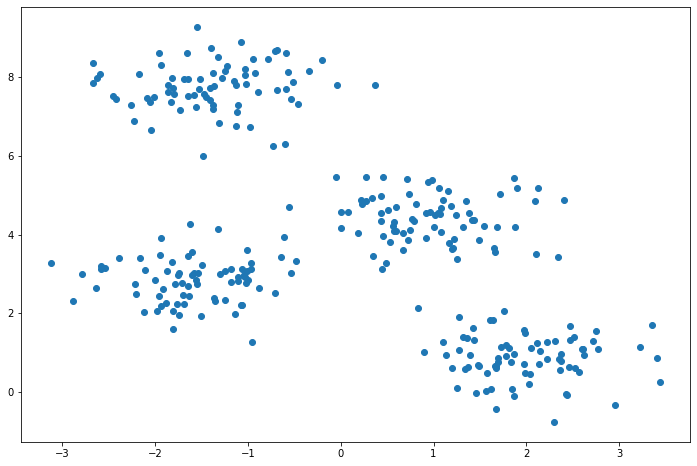

In [3]:
# 데이터 1
x, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'])
plt.show()

# 2.k-means

### (1) k means 모델 만들기

In [4]:
# k means 모델 만들고 예측하기
model = KMeans(n_clusters= 2, algorithm='auto')
model.fit(x) #fitting 할 때 x만 들어감. y는 학습할 때 안 줌.
pred = model.predict(x)

In [5]:
# feature + pred + y 붙여 놓고 비교해 봅시다.
pred = pd.DataFrame(pred, columns = ['predicted'])
result = pd.concat([x, pred, y], axis = 1) # x와 pred(예측값)과 y를 붙임
# cluster 2개짜리 만들었더니 predicted가 0, 1, 0, 1, ...임
result.head()

,x1,x2,predicted,shape
0,0.836857,2.136359,0,1
1,-1.413658,7.409623,1,3
2,1.155213,5.099619,0,0
3,-1.018616,7.814915,1,3
4,1.271351,1.892542,0,1


In [6]:
model.cluster_centers_
# 첫번째 센터의 좌표값 : [ 0.45233231,  2.68105561]
# 두번째 센터의 좌표값 : [-1.33465447,  7.69442683]

array([[ 0.45233231,  2.68105561],
       [-1.33465447,  7.69442683]])

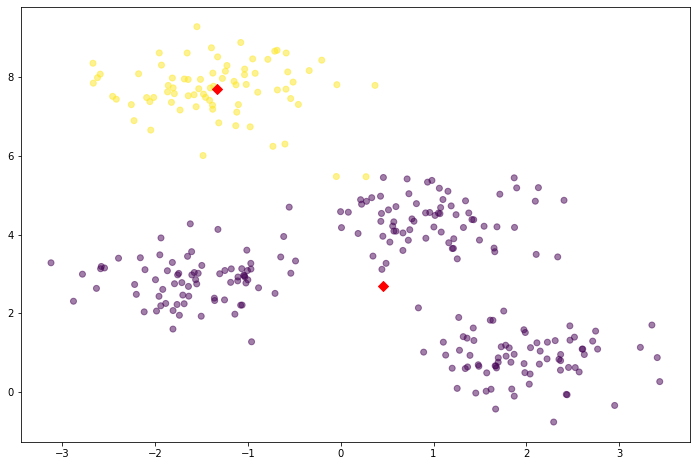

In [7]:
# 결과를 시각화하여 살펴봅시다.

# k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

# scatter plot
plt.figure(figsize = (12,8))
plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
plt.show()


* k 값에 따라 모델을 생성하고 그래프 그리기 함수

In [8]:
def k_means_plot(x, y, k) : 
    model = KMeans(n_clusters= k, algorithm='auto')
    model.fit(x)
    pred = model.predict(x)

    pred = pd.DataFrame(pred, columns = ['predicted'])
    result = pd.concat([x, pred, y], axis = 1)

    # k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
    centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

    # scatter plot
    plt.figure(figsize = (12,8))
    plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
    plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
    plt.show()

## (2) 적절한 K 값 찾기

### 1) k 값을 조절하며 결과를 살펴 봅시다.

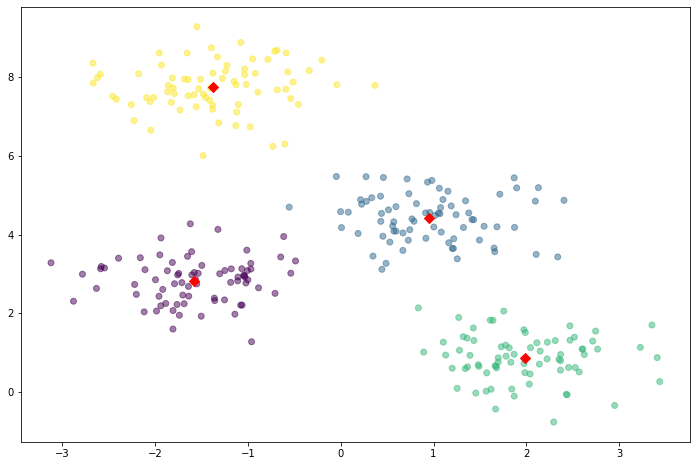

In [9]:
# k 값을 1~8까지 조절해 봅시다.
k_means_plot(x, y, k = 4)


### 2) Inertia 값으로 적정 K 값 찾기

* 눈으로 먼저 보니까 몇개로 군집화 할지 보이지만, 실전에서는 거의 보고 판단할 수 없을 것입니다.
* 그러면 군집의 개수를 어떻게 고를 수 있을까요?

In [10]:
# k means 모델을 생성하게 되면 inertia 값을 확인할 수 있습니다.
model.inertia_

1190.782359364345

In [11]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1,10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


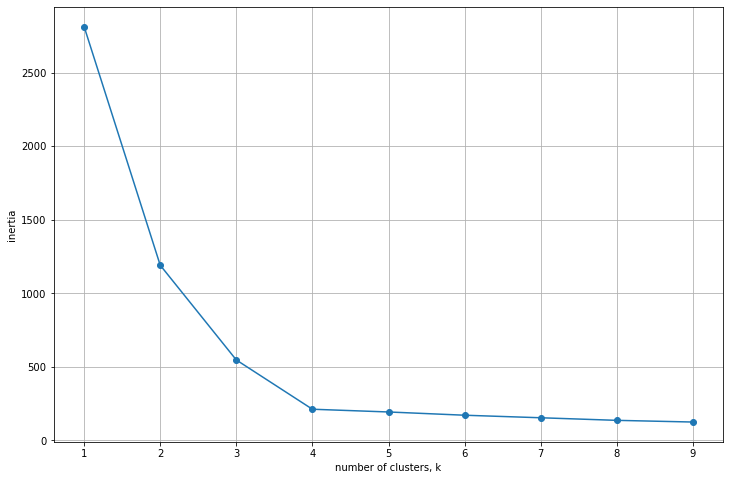

In [12]:
# Plot k vs inertias
plt.figure(figsize = (12,8))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

* 위 결과로 부터 적절한 k 값을 정해 봅시다.

In [13]:
# 4!

## (3) K-means 한계

### 1) Sample Data 2

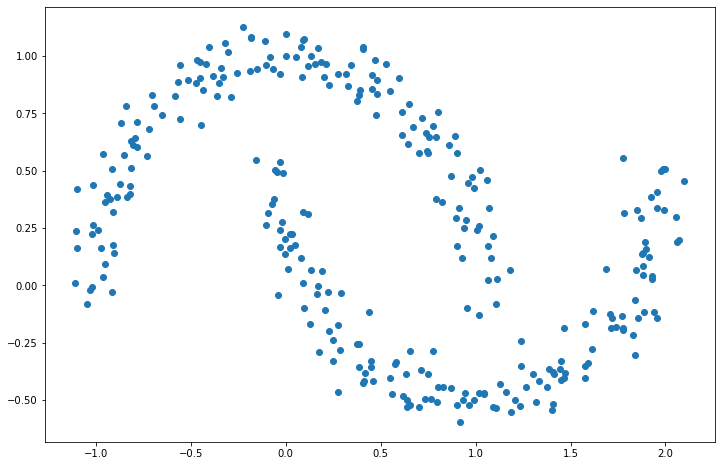

In [14]:
x, y = make_moons(n_samples = 300, noise = .08, random_state=2)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'])
plt.show()

# 이런 그림일 때 k-means는 실력을 발휘하지 못할 가능성이 높음

### 2) k means 모델 만들기
* k 두개?

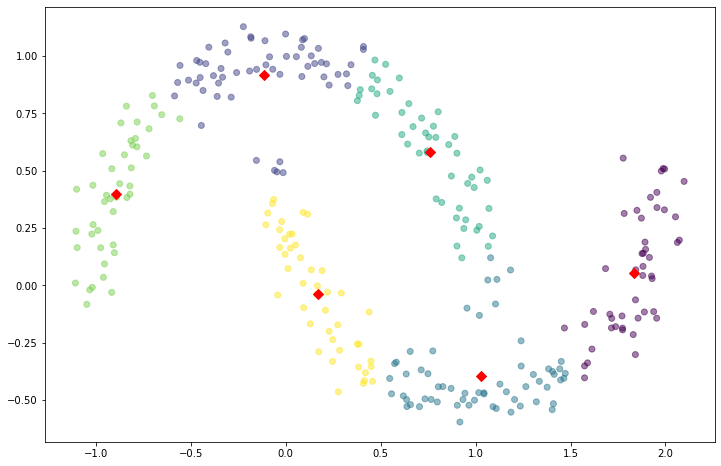

In [15]:
k_means_plot(x, y, k = 6)

### 3) inertia를 이용하여 k값 찾기

In [16]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(1,15) # 1-14까지
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


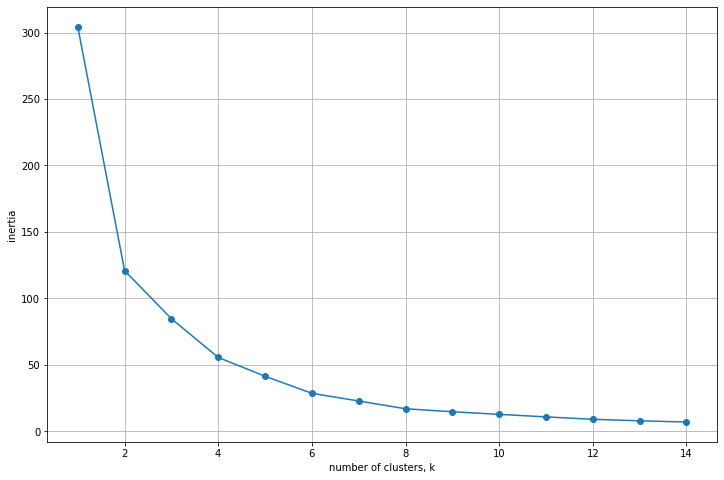

In [17]:
# Plot k vs inertias
plt.figure(figsize = (12,8))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

# 4? 6? 2?
# 난 2였으면 좋겠는뎅..

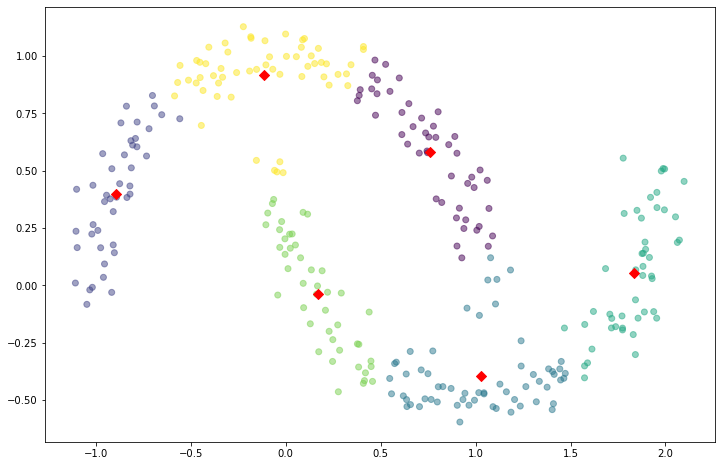

In [18]:
# 적절한 k값으로 모델을 생성해 봅시다.
k_means_plot(x, y, k = 6)

# 그리고 잘 분류된것같지 않은 점들도 있음.
# 이걸 어떻게 해결하지?
# 이걸 해결할 수 있는 방법이 DBSCAN입니다.

* 우리가 기대하는 바대로 모델이 생성되지 않았습니다.
* k means는 볼록한 덩어리 cluster 구분에서는 괜찮지만, 위와 같은 구조는 사용하기 곤란합니다.

# 3.DBSCAN

## (1) dbscan 모델 만들기

In [38]:
# DBSCAN 모델을 만들어 봅시다.
model = DBSCAN(eps=0.1, min_samples=3)
model.fit(x)

DBSCAN(eps=0.1, min_samples=3)

In [39]:
# fitting한 후에 모델의 labels_ 값이 찾아낸 군집 종류입니다.
clusters = model.labels_

In [40]:
# 군집 번호 중 -1은 이상치를 의미합니다.(어느 군집에도 포함 안되는 값들!)
clusters

# -1은 이상치, 찾은 클라스터의 갯수가 0~가장큰값이 12 => 13개.

array([ 0,  1,  2,  7,  3,  1,  4,  4,  2,  0,  9,  5,  3,  2,  5,  0,  0,
        6,  6,  0,  3,  4,  2, -1,  2,  0,  2,  2,  7,  8,  5,  2, -1,  2,
        2,  2,  2,  9,  0,  5, 10,  0,  3,  4,  9,  2,  5,  5,  0,  2,  2,
        8,  5,  2, 10,  4, -1,  2,  2,  2,  0, -1,  2,  0,  2, 11,  2, 10,
        5,  2,  0,  2,  2,  0,  4,  2, -1,  2,  6,  2,  0,  4,  8,  5,  2,
       11,  3,  2,  5,  0,  7,  2,  2,  0,  4,  2,  5, 11,  0, -1,  5, 11,
        8,  5, 10,  7,  2,  2,  0,  2,  5,  0, 12,  2,  4,  0,  0,  2,  2,
       12,  6,  4,  0,  0,  2,  5,  2,  2,  5,  8,  6,  8,  2,  2,  0,  2,
        4,  3,  9,  0,  2,  2,  9,  2,  0,  3, -1,  0,  6,  5,  7,  0,  7,
       -1,  2,  2,  4,  6,  5,  7,  7,  5,  4,  2,  8,  2, 11,  8,  9,  2,
        5,  2,  9,  1,  0,  7,  0,  0,  2,  9,  7,  0,  8,  6,  7,  5,  9,
        2,  3,  0,  2,  2,  0, 12,  3,  0,  2,  2,  2,  6,  0,  3,  2,  2,
        6,  4,  0,  2,  2,  2,  2,  2,  2,  6,  5,  0,  4,  2,  2,  7, -1,
       -1,  0,  8,  2,  6

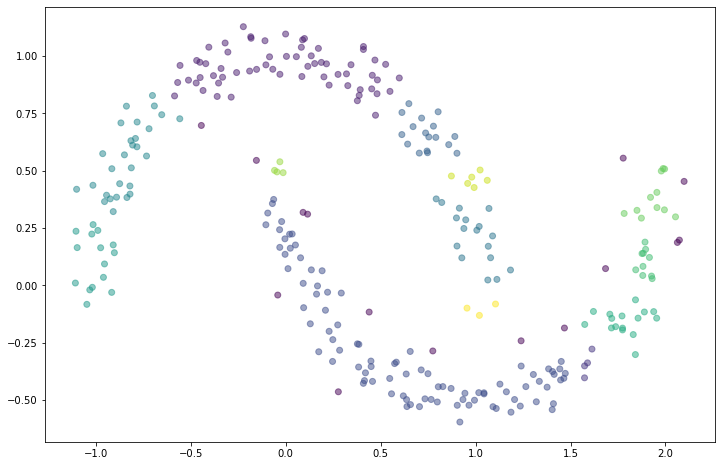

In [41]:
plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
plt.show()

* eps를 적용하며 모델 생성하고 그래프 그리기

In [42]:
def dbscan_plot(x, y, eps) :
    model = DBSCAN(eps=eps, min_samples=3)
    model.fit(x)
    clusters = model.labels_
    plt.figure(figsize = (12,8))
    plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
    plt.show()

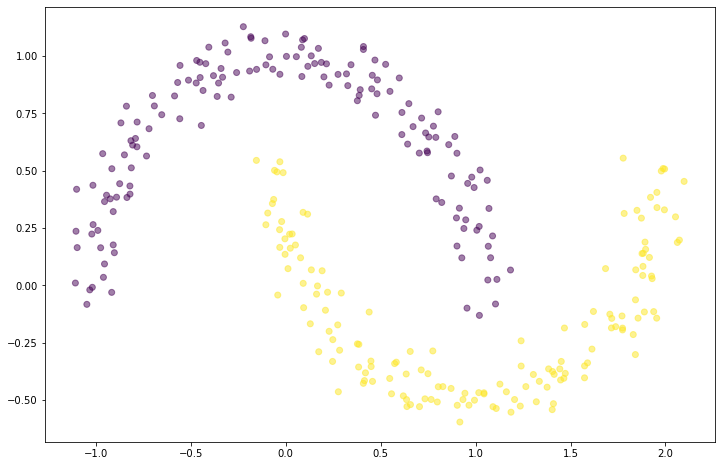

In [54]:
dbscan_plot(x, y, 0.209)

## (2) 적절한 eps 값 찾기 
* 역시 눈으로 보면서 찾는 것은 실전에서는 거의 불가능합니다.
* DBSCAN에도 적절한 값을 찾는 방법이 있습니다.

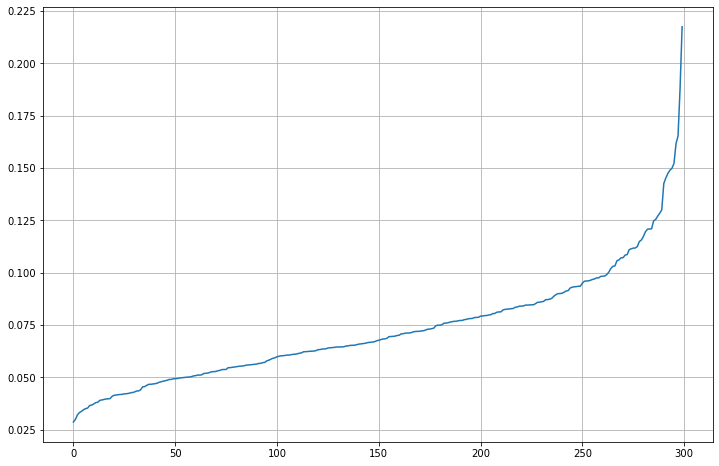

In [55]:
# 각점과 근처 5개 점과의 평균 거리
knnDist = NearestNeighbors().fit(x)
distances, _ = knnDist.kneighbors(x)
dist = np.mean(distances[:,1:], axis = 1)
dist = np.sort(dist)

plt.figure(figsize = (12,8))
plt.plot(dist)
plt.grid()
plt.show()

# 0.125 - 0.15가 적절하겠다.

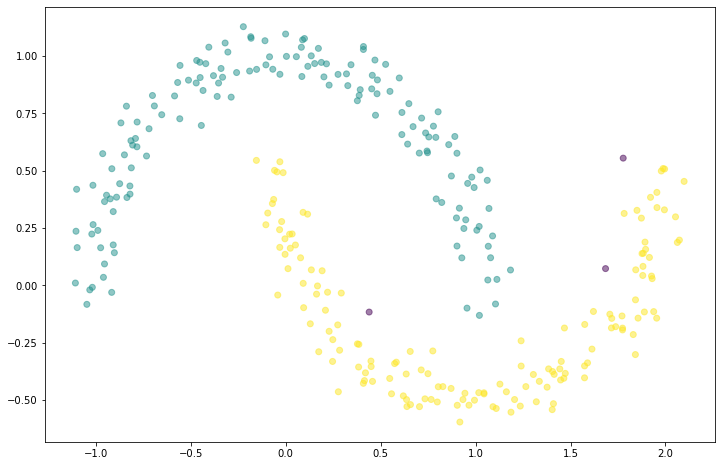

In [61]:
# 찾아낸 eps 값을 대입시켜 봅시다.

epsilon = 0.15
dbscan_plot(x,y, eps = epsilon)

# 4.이동통신 고객 분석

* 실전에서는 scatter를 그려보면서 할 수 없습니다.
* K means와 DBSCAN 등을 이용하여 고객을 구분해 봅시다.
* (추가) 고객이 어떻게 구분되는지 추가분석을 시도해 봅시다.

## (1) 환경 준비와 데이터 로딩

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [63]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
mobile = pd.read_csv(data_path)

mobile.loc[mobile['CHURN'] == 'LEAVE', 'CHURN'] = 1
mobile.loc[mobile['CHURN'] == 'STAY', 'CHURN'] = 0

In [64]:
# 무작위로 1000개 샘플링
mobile_s = mobile.sample(1000, random_state=2021)

In [65]:
mobile_x = mobile_s.drop(['CHURN'],axis = 1)
mobile_y = mobile_s.loc[:, "CHURN"]
col_x = list(mobile_x)

In [66]:
minmax = MinMaxScaler()
mobile_x = minmax.fit_transform(mobile_x)
mobile_x = pd.DataFrame(mobile_x, columns = col_x)
mobile_x.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,0.230233,0.751724,0.719101,0.323684,0.267880,0.827586,0.071429
1,0.892978,0.279310,0.235955,0.043392,0.673602,0.103448,0.357143
2,0.301204,0.872414,0.325843,0.591912,0.265280,0.000000,0.071429
3,0.410814,0.596552,0.000000,0.670582,0.156047,0.379310,1.000000
4,0.386106,0.165517,0.629213,0.701109,0.231469,0.137931,0.000000


## (2) k-means 해보기: k값 찾기

In [67]:
ks = range(1,50) #1-49까지 inertia 찾아보기
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mobile_x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


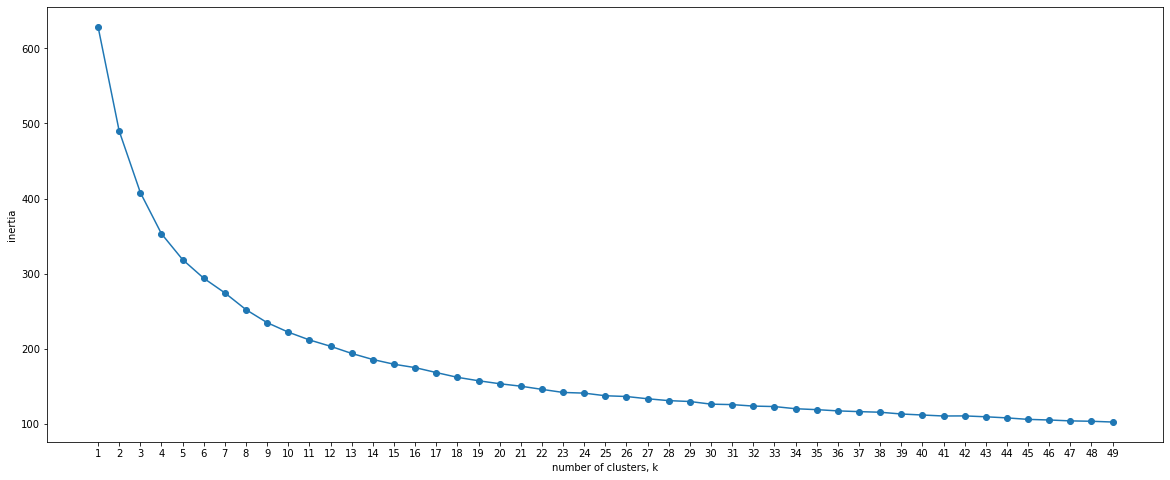

In [68]:
plt.figure(figsize=(20,8))
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# elbow가 어디지?

## (2) 모델링

In [69]:
model = KMeans(n_clusters=5)
model.fit(mobile_x)
pred = model.predict(mobile_x)
pred = pd.DataFrame(pred, columns = ['predict'])

## (3) 결과 살펴보기

In [70]:
mobile_y.reset_index(inplace=True, drop=True)
result = pd.concat([mobile_x, mobile_y, pred], axis =1)

In [71]:
result.head()

#predict가 cluster => 0-4까지, -1은 이상치

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN,predict
0,0.230233,0.751724,0.719101,0.323684,0.267880,0.827586,0.071429,0,4
1,0.892978,0.279310,0.235955,0.043392,0.673602,0.103448,0.357143,1,3
2,0.301204,0.872414,0.325843,0.591912,0.265280,0.000000,0.071429,0,4
3,0.410814,0.596552,0.000000,0.670582,0.156047,0.379310,1.000000,0,0
4,0.386106,0.165517,0.629213,0.701109,0.231469,0.137931,0.000000,0,2


In [72]:
result.CHURN = result.CHURN.astype('int')

* 클러스터 별 고객이탈율

In [73]:
result.groupby('predict')['CHURN'].mean

# 1이 0.466
# 0그룹은 1이 0.666 => 비율 높음
# 1그룹은 1이 0.323 => 비율 낮은
# 3, 4그룹은 1ㅇ 0.5정도 => 비슷한 비율 => 혹시 같은 그룹아냐? t검정해보자.
# 0그룹은 이탈률 엄청높고, 1그룹은 이탈률 낮음 => 어떤 집단이 모여있는거지? 확인해보자!!

# 그래서 추가분석해보자.
# 추가분석을 통해 new feature를 만들어 낼 수 있다.

predict
0    0.666667
1    0.323432
2    0.447674
3    0.504902
4    0.514620
Name: CHURN, dtype: float64

In [74]:
# 전체 평균
result['CHURN'].value_counts() / result.shape[0]

# 전체 이탈률이 0.466


0    0.534
1    0.466
Name: CHURN, dtype: float64